## BANKNOTE AUTHENTICATION
Problem to solve : To Predict whether the note is genuine or not



Importing initial libraries

In [300]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

import warnings
warnings.filterwarnings('ignore')

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

Reading the CSV file

In [275]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HappyMonk/MultiLayerPerceptron-1621c5c58cde50a3d30dafc585f88161a9483f1c/MultiLayerPerceptron-1621c5c58cde50a3d30dafc585f88161a9483f1c/BankNote_Authentication.csv")

In [276]:
df.shape

(1372, 5)

Let's print the first few elements in the dataset



In [277]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


### EDA & Preprocessing

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   class     1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [279]:
# checking for null values
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

The dataset is very clean and has no null values present.

In [280]:
df.describe()

,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


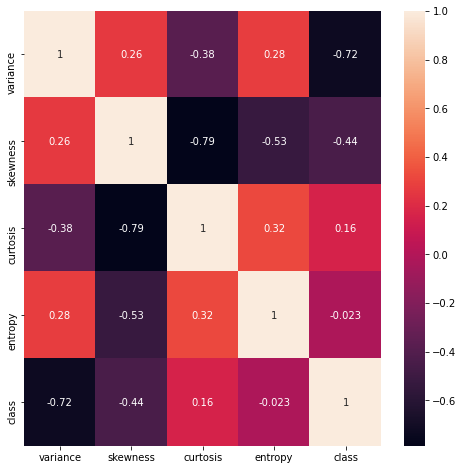

In [281]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

Let's have a look at the countplot of the classes available.

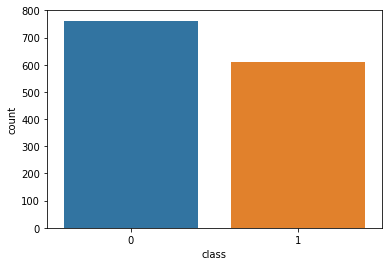

In [282]:
plt.figure()
sns.countplot(data = df, x='class')
plt.show()

Both the classes have nearly equal count. Hence, the dataset has good balance

**visualizing continuous variables**

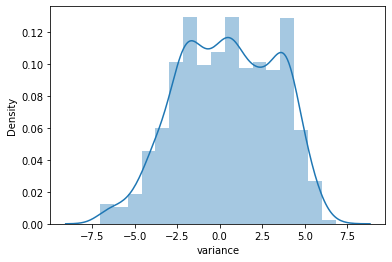

-0.14922432617971165


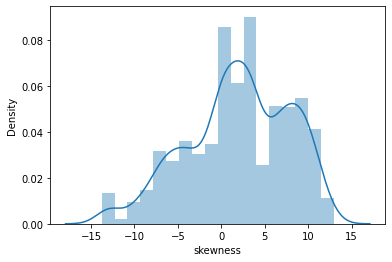

-0.3936724723813983


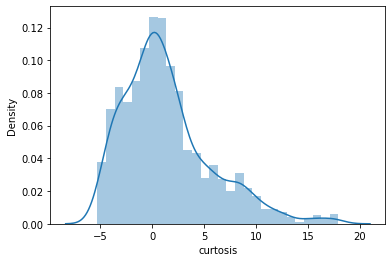

1.0873780556996202


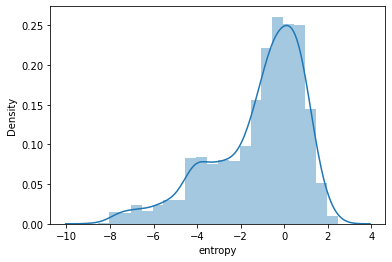

-1.0211250915668673


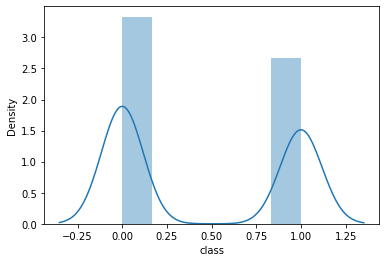

0.22294676999690854


In [283]:
for col in df:
  plt.figure()
  sns.distplot(df[col])
  plt.show()
  print(skew(df[col]))

Most of the features nearly follow a normal distribution.

Let's visualize a pairplot for better understanding

<Figure size 432x288 with 0 Axes>

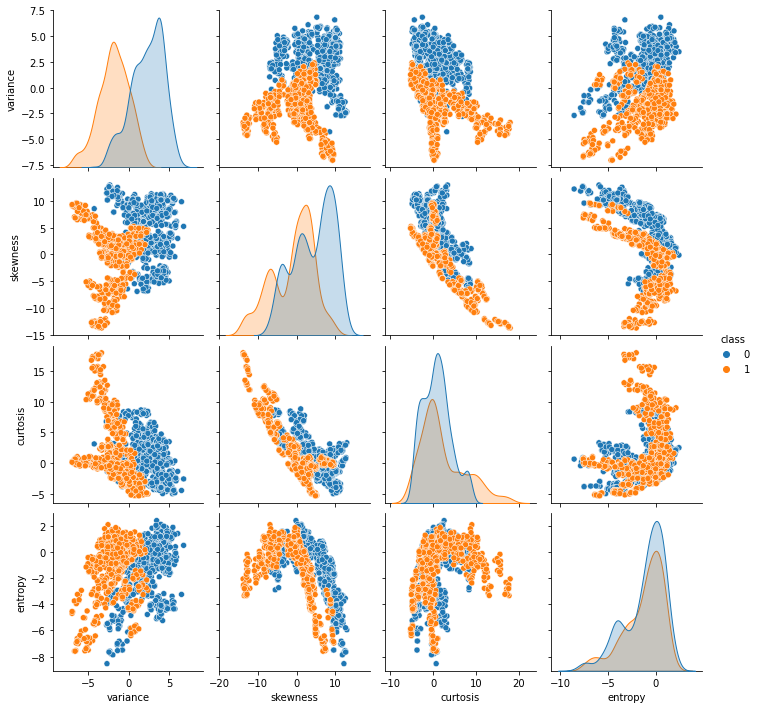

In [284]:
plt.figure()
sns.pairplot(data=df,hue='class')
plt.show()

**There are clear separations shown, especially for pairs of features having 'variance'. The curtosis-entropy scatterplot exhibits the lowest separation**

 Here we use iloc for seprating labels and feature  

In [285]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [286]:
# splitting data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state=1)

Now that we are ready with the feature vectors, let's perform the PCA decomposition

In [287]:
# Applying PCA function on training
# and testing set of X component
from sklearn.decomposition import PCA
  

pca = PCA(n_components = 2)
  
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [288]:
# Scaling data

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## ANN

In [289]:
# initializing ann
model = Sequential()

In [290]:
# adding the first input layer and the first hidden layer
model.add(Dense(1,input_shape=(X_train.shape[1],),activation='sigmoid'))

In [291]:
## model summary
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


## Mean Squared Logarithmic Error Loss

In [292]:
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [293]:
model_history = model.fit(X_train,y_train,batch_size = 20, epochs = 100,validation_data=(X_train,y_train))

Epoch 1/100
48/48 [==============================] - 1s 5ms/step - loss: 0.9067 - accuracy: 0.5031 - val_loss: 0.8970 - val_accuracy: 0.5083
Epoch 2/100
48/48 [==============================] - 0s 2ms/step - loss: 0.8884 - accuracy: 0.5104 - val_loss: 0.8792 - val_accuracy: 0.5177
Epoch 3/100
48/48 [==============================] - 0s 2ms/step - loss: 0.8708 - accuracy: 0.5208 - val_loss: 0.8620 - val_accuracy: 0.5229
Epoch 4/100
48/48 [==============================] - 0s 3ms/step - loss: 0.8539 - accuracy: 0.5219 - val_loss: 0.8453 - val_accuracy: 0.5229
Epoch 5/100
48/48 [==============================] - 0s 2ms/step - loss: 0.8376 - accuracy: 0.5281 - val_loss: 0.8294 - val_accuracy: 0.5281
Epoch 6/100
48/48 [==============================] - 0s 3ms/step - loss: 0.8219 - accuracy: 0.5333 - val_loss: 0.8138 - val_accuracy: 0.5375
Epoch 7/100
48/48 [==============================] - 0s 2ms/step - loss: 0.8067 - accuracy: 0.5396 - val_loss: 0.7990 - val_accuracy: 0.5448
Epoch 8/100
4

###  Training vs Test loss

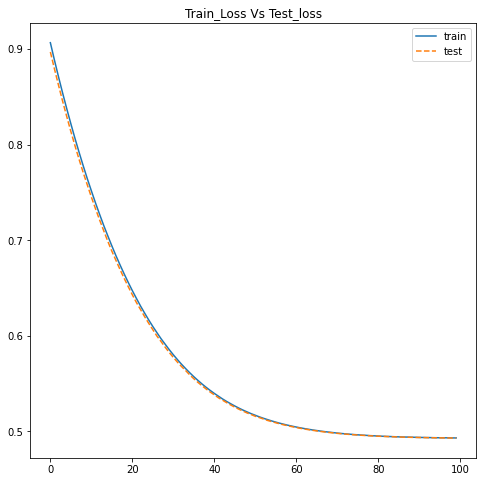

In [294]:
fig , ax = plt.subplots(figsize=(8,8))
plt.title('Train_Loss Vs Test_loss')
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'],label='test',linestyle='--')
plt.legend()
plt.show()

###  Train_Accuracy vs. Test_Accuracy

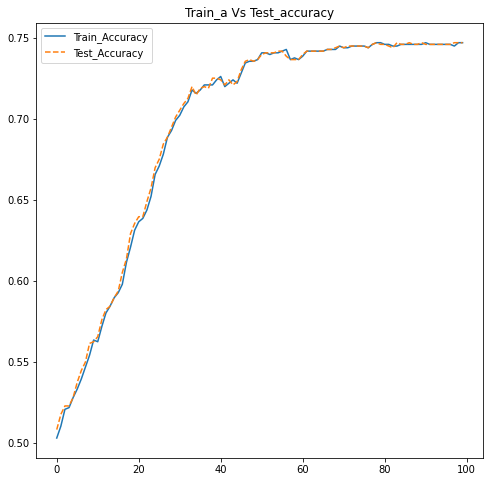

In [295]:
fig , ax = plt.subplots(figsize=(8,8))
plt.title('Train_a Vs Test_accuracy')
plt.plot(model_history.history['accuracy'], label='Train_Accuracy')
plt.plot(model_history.history['val_accuracy'],label='Test_Accuracy',linestyle='--')
plt.legend()

In [296]:
y_pred = model.predict(X_test)

In [299]:
y_pred_base = np.where(y_pred>0.5,1,0)

In [301]:
print(classification_report(y_test,y_pred_base))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       235
           1       0.71      0.69      0.70       177

    accuracy                           0.75       412
   macro avg       0.74      0.74      0.74       412
weighted avg       0.74      0.75      0.74       412



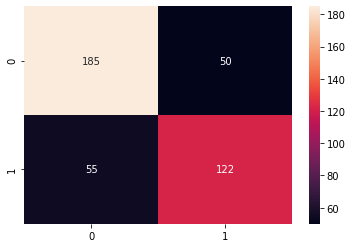

In [303]:
mat1 = confusion_matrix(y_test,y_pred_base)
sns.heatmap(mat1,annot=True,fmt='d')

**we can see that the model achieved an estimated classification accuracy of about 79%.**

### Thank You !